In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from hpylib.util.remote_data import *
from hpylib.util.sptsz_end2end import *

In [2]:
def make_test(end2end_file, dls_theory_file):
    n = restore_end_save(sync_from_remote('midway', end2end_file))
    dls_theory = np.loadtxt(sync_from_remote('midway', dls_theory_file), usecols=[1])
    dls_theory = np.tile(dls_theory, (3,1))
    winfunc = n['winfunc_sims']
    winminell = n['winminell']
    winmaxell = n['winmaxell']
    bands = n['bands']

    dbs_theory = dls2dbs(dls_theory, winfunc, winminell=winminell, winmaxell=winmaxell)
    dbs_sims_all = n['dbs_sims']
    dbs_sims_ave = np.mean(dbs_sims_all, axis=0)
    
    plt.plot(bands, dbs_sims_ave[2,:]/dbs_theory[2,:])
    plt.plot([0,3000],[1.0,1.0])
    plt.xlim([500,3000])
    plt.ylim([0.95,1.05])

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in divide


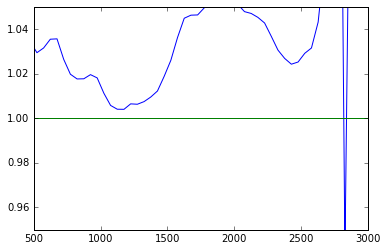

In [3]:
"""
read the combined end2end from the new sims, with masks from lps14
I did not re-calculate the kernel from the masks
"""
s150s_h143s_file = '~/data_midway/projects/sptxhfi/pspec/bandpower_spt_sn_hfi_sn/end_combined_spt150s_hfi143s.sav'
dls_150_file     = '~/data_midway/projects/sptxhfi/simulations/input/dls_input_spt_150.txt'
make_test(s150s_h143s_file, dls_150_file)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in divide


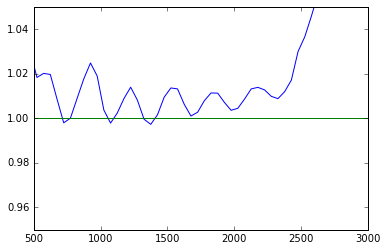

In [4]:
"""
Now read the combined end2end from the signal only sims
"""
s150s_h143s_old = \
'~/data_midway/projects/sptxhfi/powspec/end2end_spt_hfi/end_combined_spt150_hfi143_signal_only_sims_run_04p1.sav'
dls_150_old = '~/data_midway/projects/spt_x_planck/sims/input/dls_input_spt_150.txt'
make_test(s150s_h143s_old, dls_150_old)